In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
exp6_1_df = pd.read_csv('./csv/exp6_1.csv', sep=',')

In [3]:
exp6_2_df = pd.read_csv('./csv/exp6_2.csv', sep=',')

In [4]:
exp6_3_df = pd.read_csv('./csv/exp6_3.csv', sep=',')

In [5]:
exp6_4_df = pd.read_csv('./csv/exp6_4.csv', sep=',')

In [6]:
exp6_5_df = pd.read_csv('./csv/exp6_5.csv', sep=',')

In [7]:
dataframes = [exp6_1_df, exp6_2_df, exp6_3_df, exp6_4_df, exp6_5_df]

In [9]:
for df in dataframes:
    df.rename(columns={'TYAGA_processed (kg)': 'weight_kg',
    'FT_F01_raw (rpm)': 'flow_Hz'
    }, inplace=True)

In [10]:
for df in dataframes:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [11]:
for df in dataframes:
    df['weight_kg_diff'] = df['weight_kg'].diff()

In [28]:
# Объединение всех датафреймов
combined_df = pd.concat(dataframes, ignore_index=True)

In [17]:
df.columns

Index(['Timestamp', 'Relative_Time', 'TYAGA_raw (kg)', 'weight_kg', 'flow_Hz',
       'weight_kg_diff'],
      dtype='object')

In [42]:
def fig_weight_flow(df, exp_number):
    # Создание фигуры и оси
    fig, ax1 = plt.subplots(figsize=(18, 6))
    
    # Построение графика для 'weight_kg'
    ax1.plot(df['Relative_Time'], df['weight_kg'], color='tab:blue')
    ax1.set_xlabel('Relative_Time')
    ax1.set_ylabel('Масса, кг', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Построение графика для 'weight_kg_diff'
    ax1.plot(df['Relative_Time'], df['weight_kg_diff'], color='tab:green')
    ax1.set_xlabel('Relative_Time')
    ax1.set_ylabel('Изменение массы, кг', color='tab:green')
    ax1.tick_params(axis='y', labelcolor='tab:green')
    
    # Создание второй оси y
    ax2 = ax1.twinx()
    ax2.plot(df['Relative_Time'], df['flow_Hz'], color='tab:red')
    ax2.set_ylabel('Показания расходомера, Гц', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    
    # Опционально: форматирование и улучшение внешнего вида графика 
    plt.title(f'График Масса и Показания расхоодомера по времени, измерение №{exp_number}')
    fig.tight_layout()  # Чтобы графики не перекрывались
    
    # Отображение графика
    plt.show()

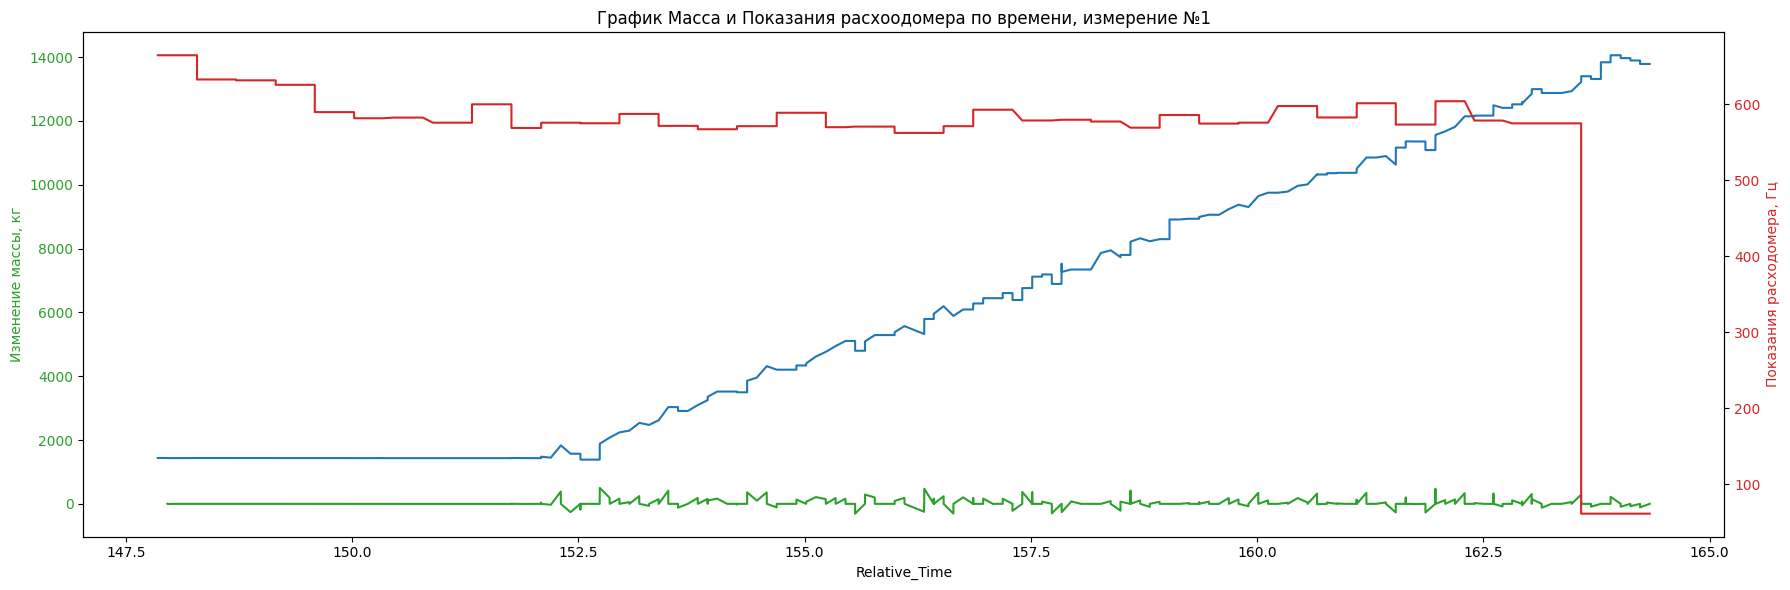

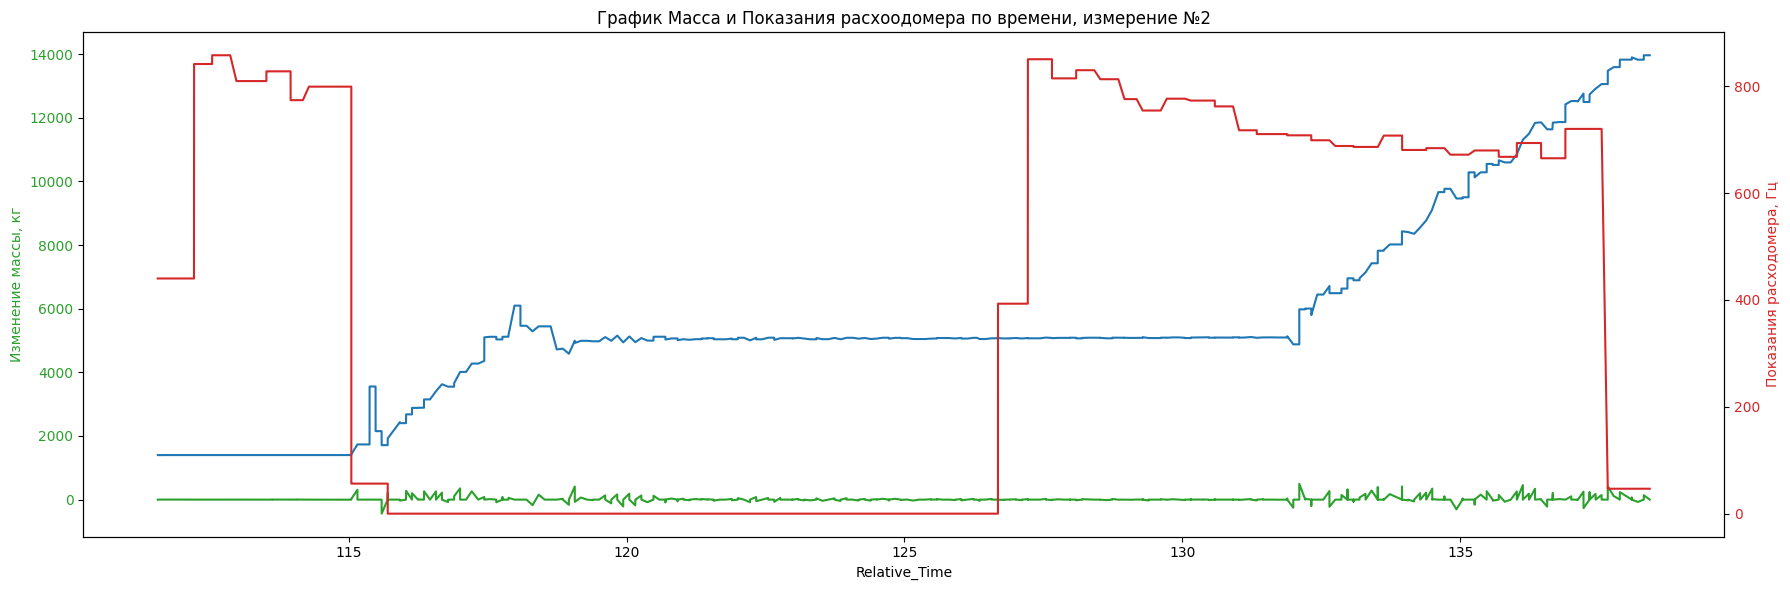

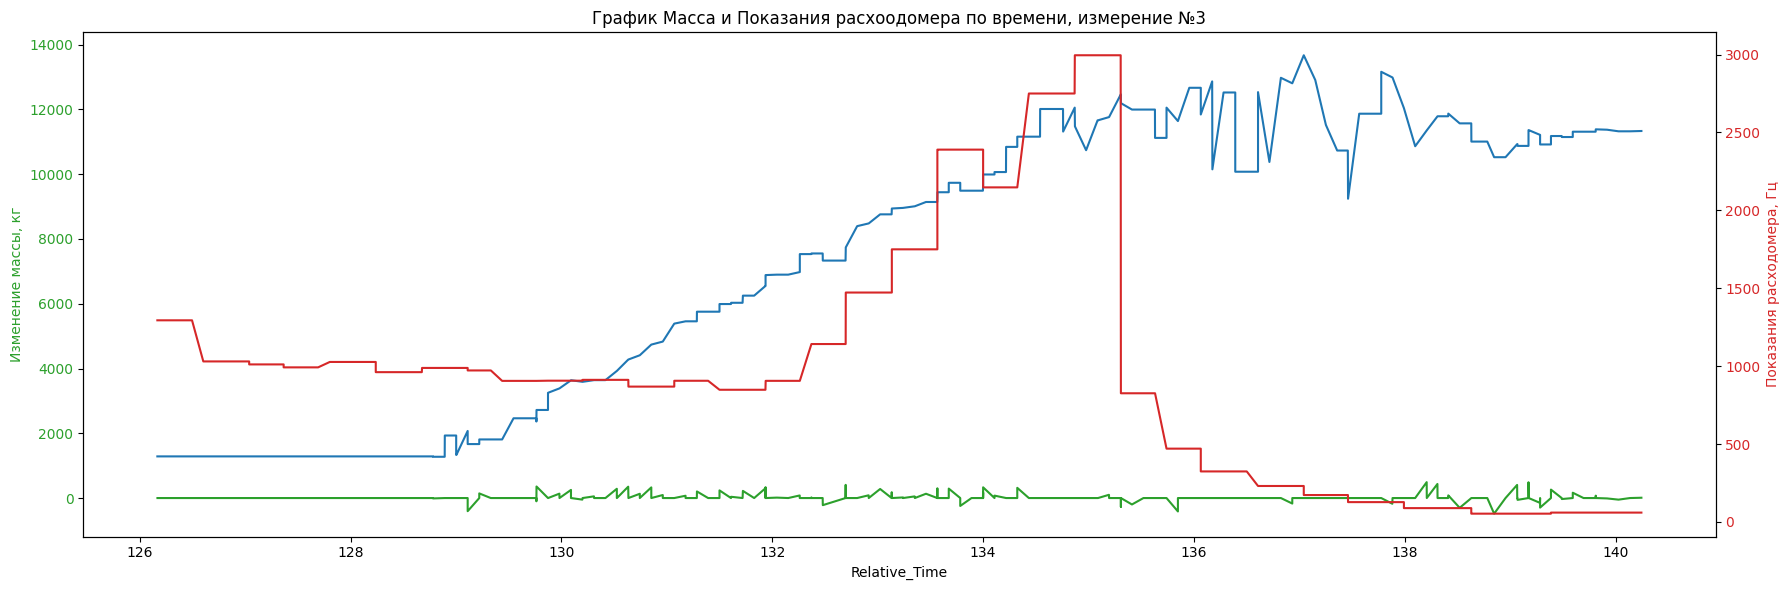

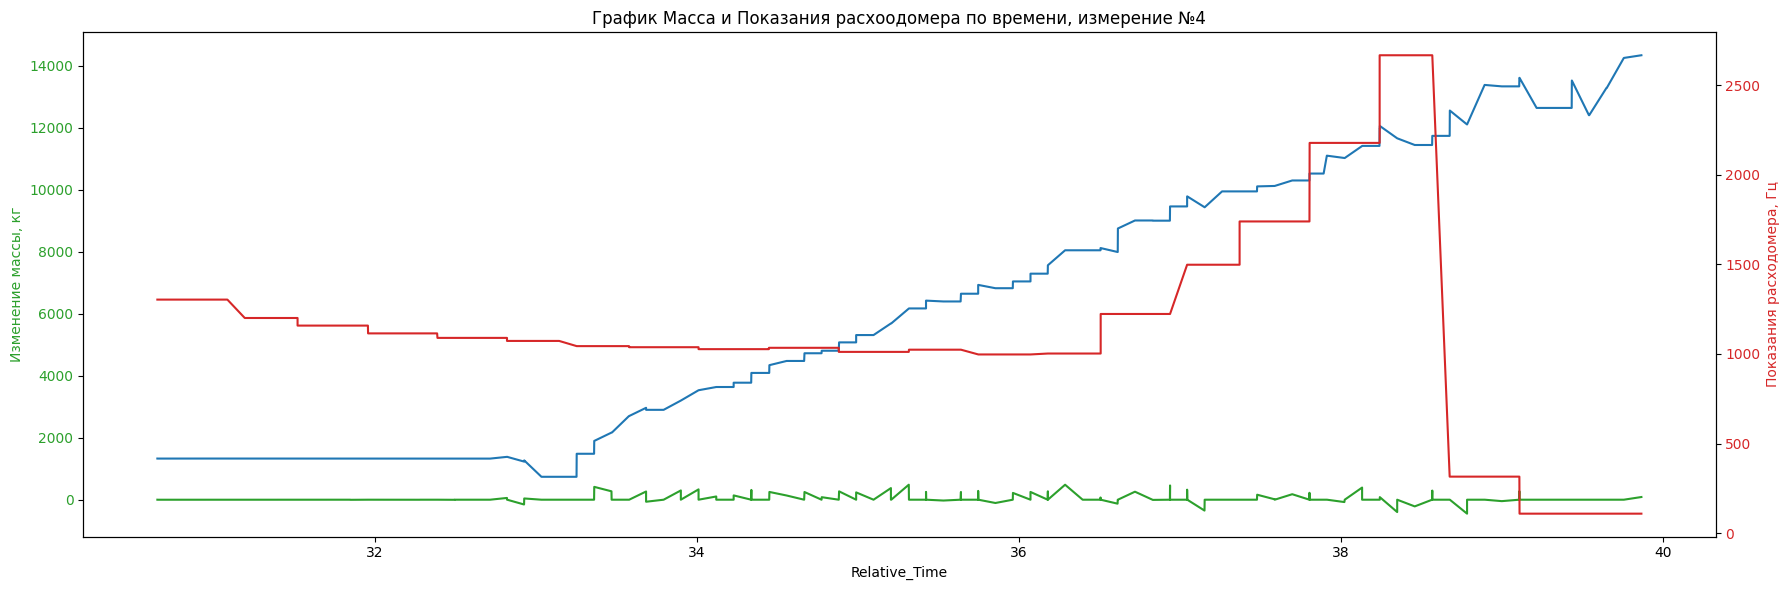

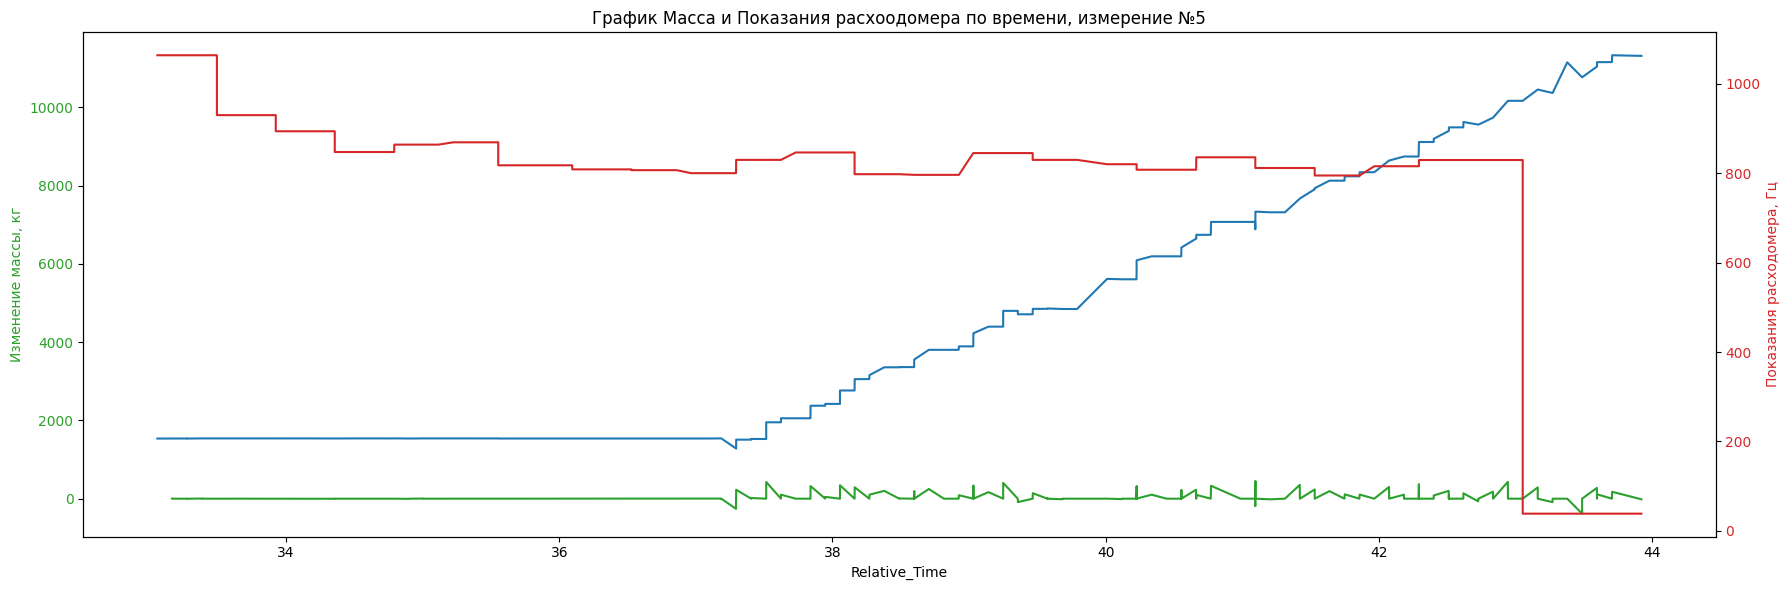

In [43]:
for exp_number, df in enumerate(dataframes, start=1):
    fig_weight_flow(df, exp_number)

In [35]:
# Пример обработки отрицательных значений
def replace_negative_with_previous(df):
    # Заменяем отрицательные значения на NaN
    df['weight_kg'] = df['weight_kg'].apply(lambda x: np.nan if x < 0 else x)
    
    # Заполняем NaN предыдущими неотрицательными значениями
    df['weight_kg'] = df['weight_kg'].fillna(method='ffill')
    return df

In [36]:
# Применение функции ко всем датафреймам
dataframes = [replace_negative_with_previous(df) for df in dataframes]

/tmp/ipykernel_288035/453751590.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['weight_kg'] = df['weight_kg'].fillna(method='ffill')


In [14]:
for df in dataframes:
    df['weight_kg_diff'] = df['weight_kg_diff'].apply(lambda x: 0 if abs(x) > 500 else x)
    df['flow_Hz'] = df['flow_Hz'].apply(lambda x: 0 if x < 0 else x)

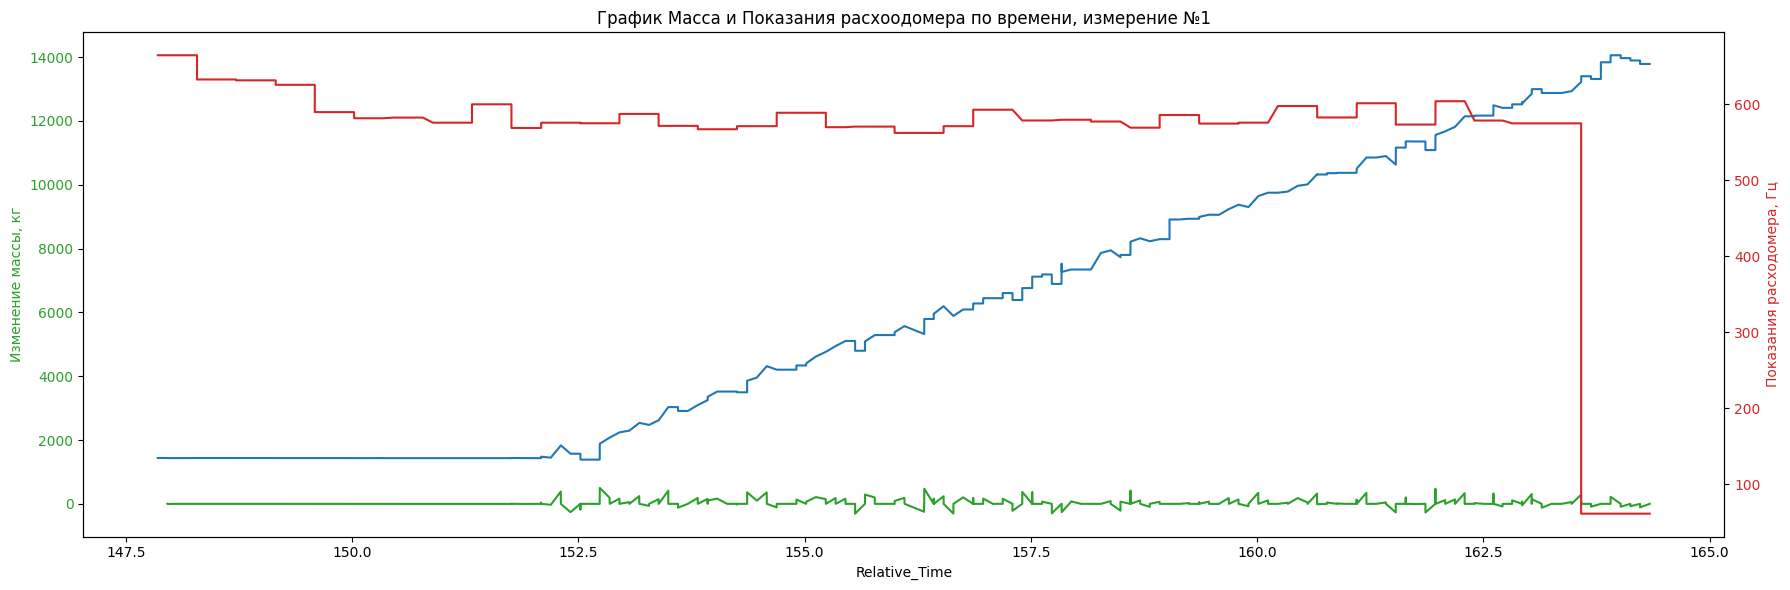

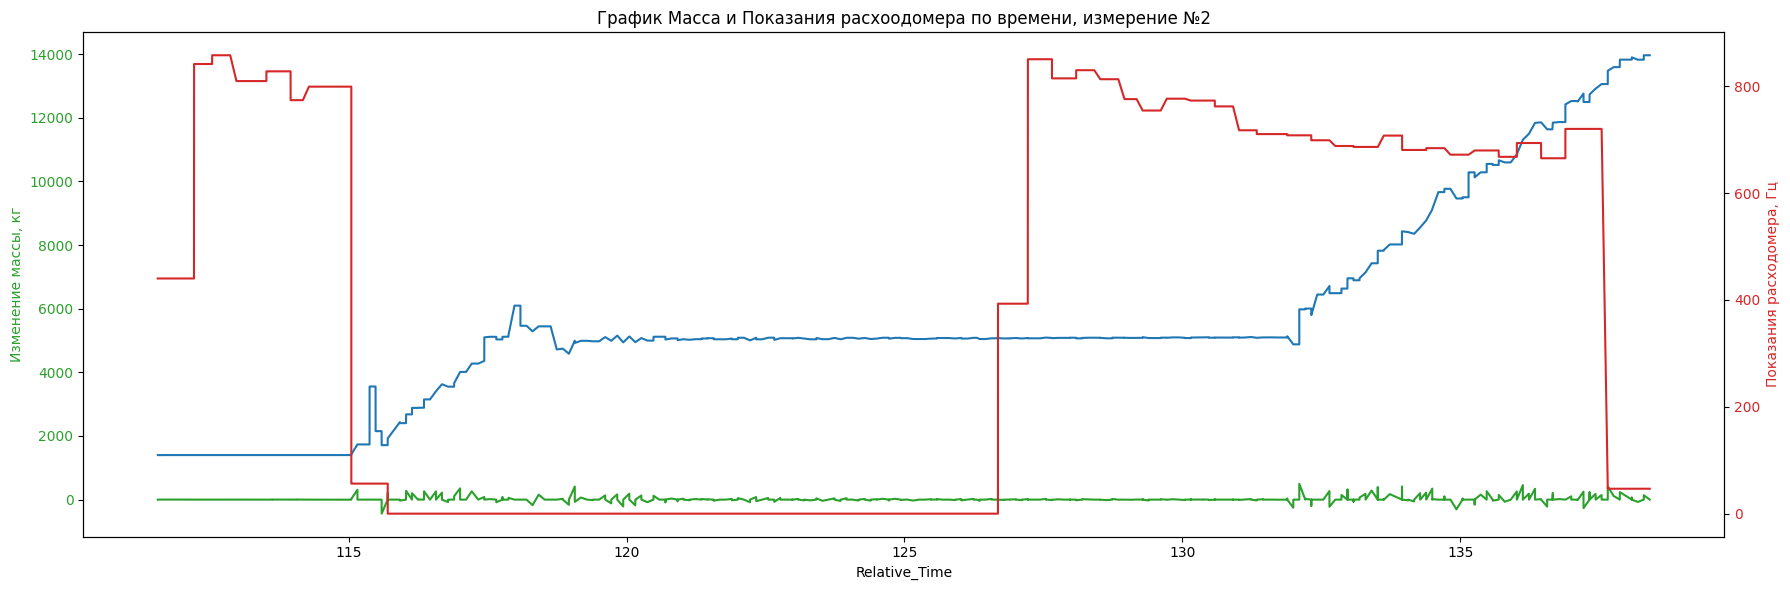

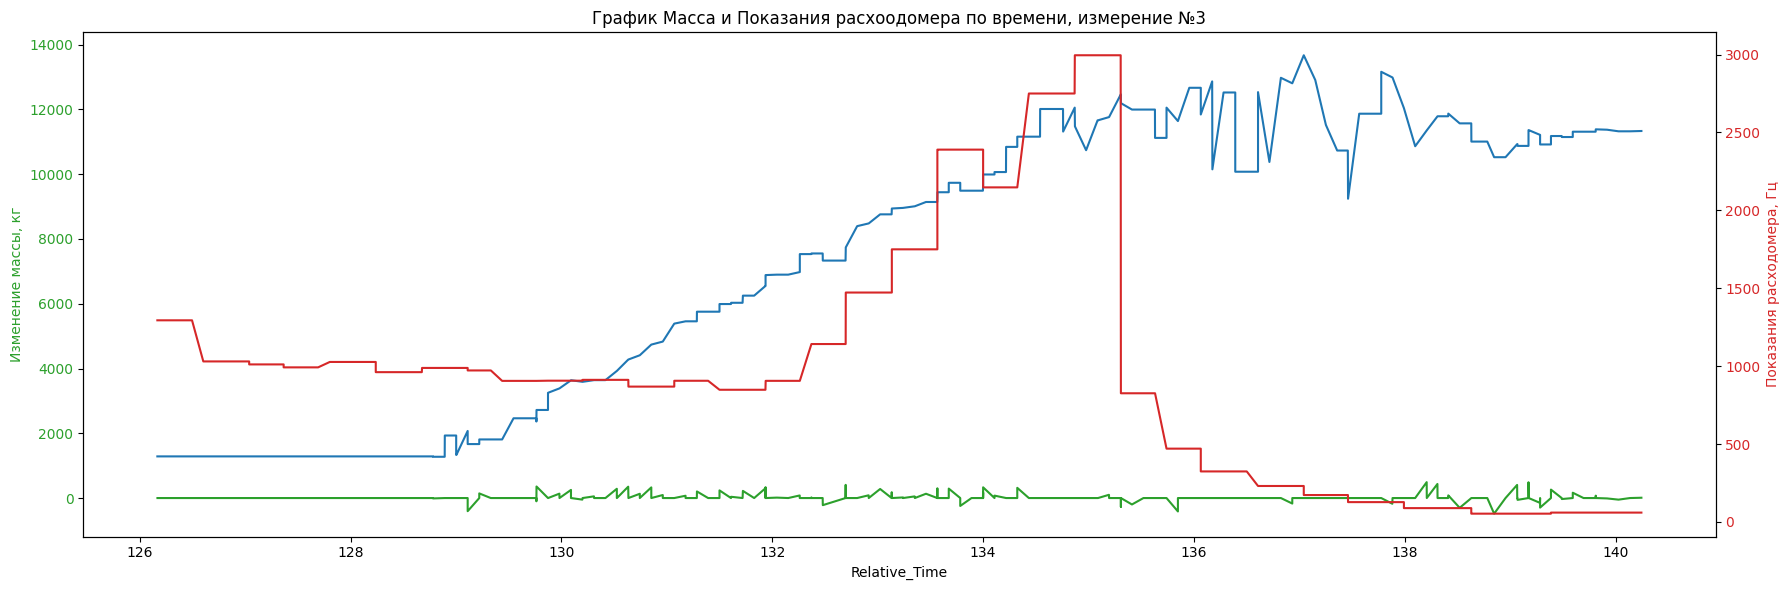

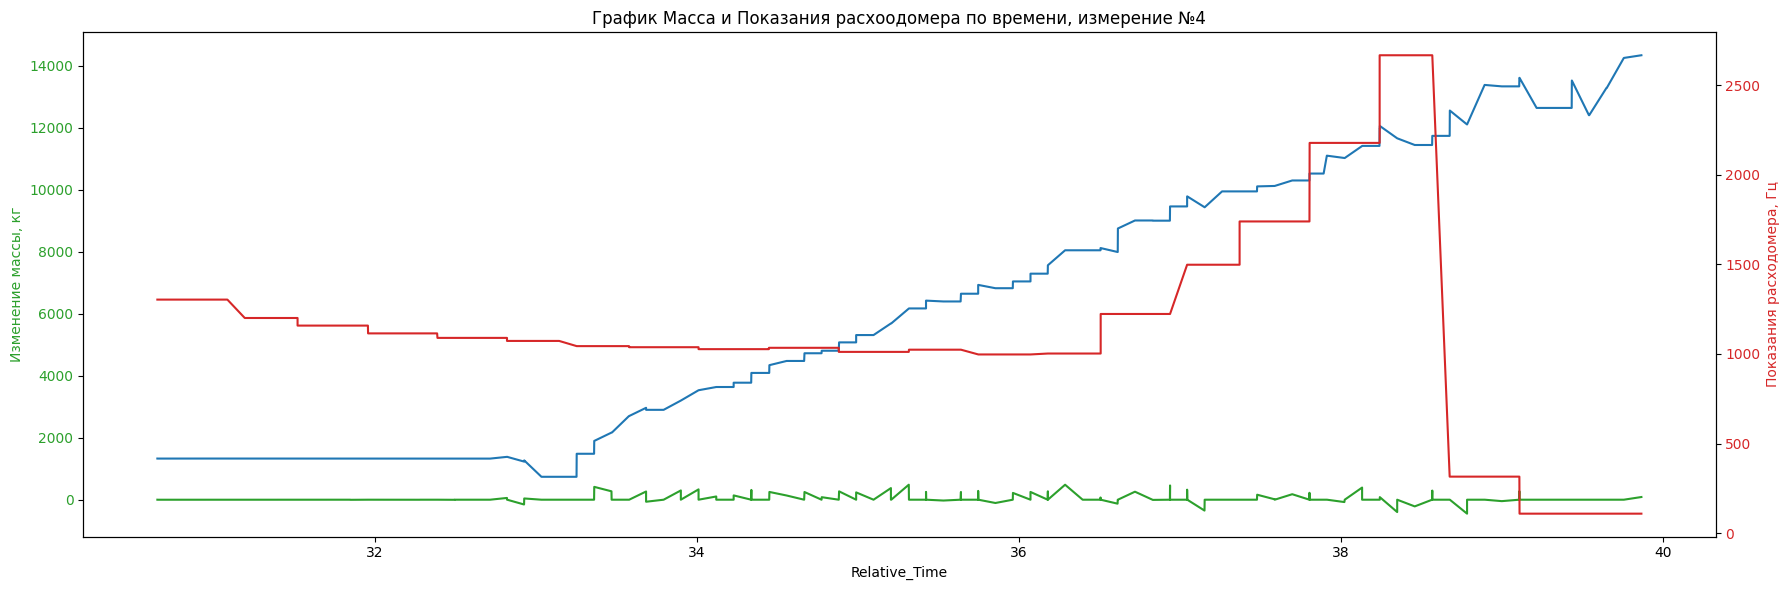

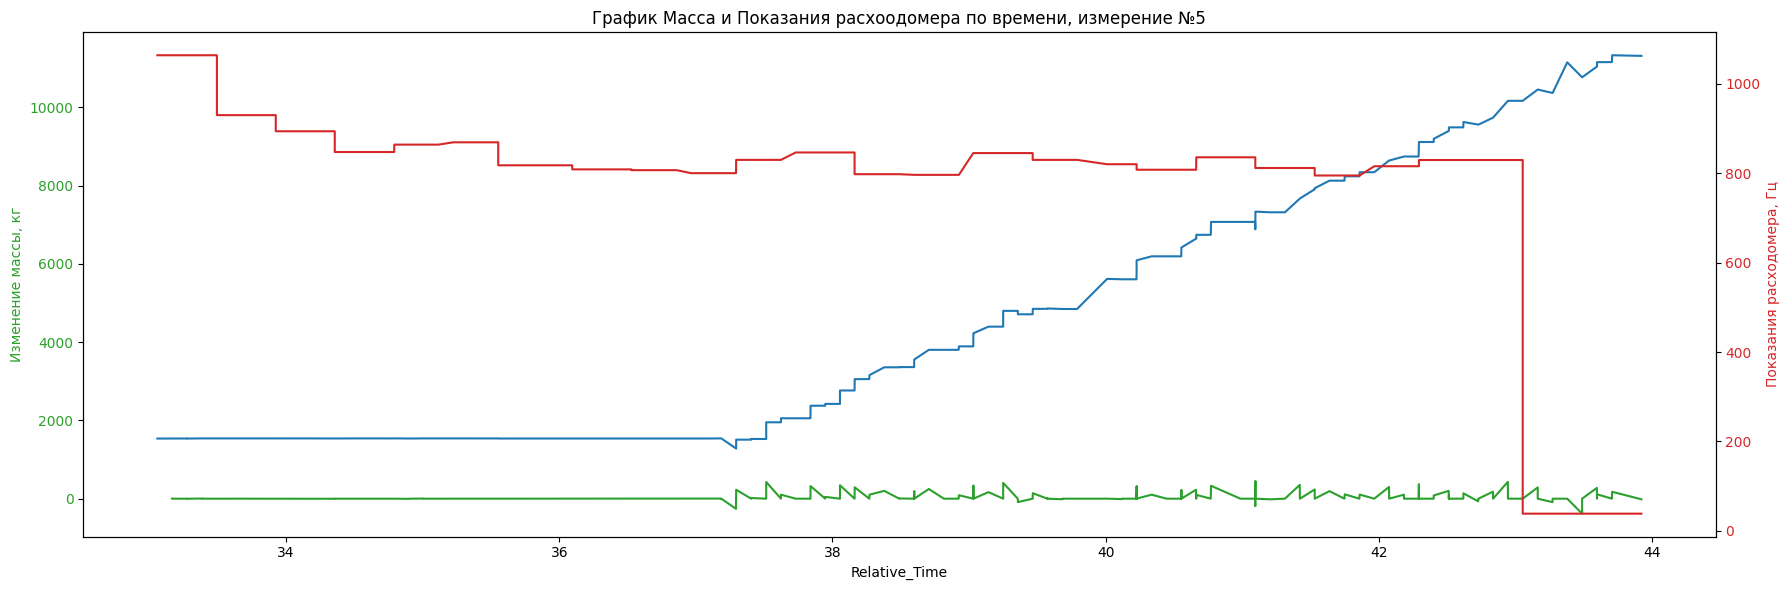

In [44]:
for exp_number, df in enumerate(dataframes, start=1):
    fig_weight_flow(df, exp_number)

In [56]:
dataframes[0][dataframes[0]['weight_kg_diff']>10]

,Timestamp,Relative_Time,TYAGA_raw (kg),weight_kg,flow_Hz,weight_kg_diff
97,2025-02-11 13:07:36.825,152.088,74260,1476.99,568.73110,44.83
101,2025-02-11 13:07:37.044,152.306,114216,1832.55,575.63900,384.67
111,2025-02-11 13:07:37.475,152.737,120064,1884.60,574.91090,498.31
112,2025-02-11 13:07:37.583,152.845,141687,2077.02,574.91090,192.42
115,2025-02-11 13:07:37.691,152.954,160081,2240.70,574.91090,163.68
...,...,...,...,...,...,...
341,2025-02-11 13:07:47.772,163.035,1368954,12998.29,574.77870,144.47
347,2025-02-11 13:07:48.210,163.473,1361704,12933.77,574.77870,56.69
349,2025-02-11 13:07:48.317,163.580,1394199,13222.94,574.77870,289.17
351,2025-02-11 13:07:48.318,163.581,1414448,13403.13,61.13591,180.19


In [57]:
dataframes[0]

,Timestamp,Relative_Time,TYAGA_raw (kg),weight_kg,flow_Hz,weight_kg_diff
0,2025-02-11 13:07:32.590,147.853,69813,1437.42,664.40770,NaN
1,2025-02-11 13:07:32.696,147.959,69813,1437.42,664.40770,0.00
2,2025-02-11 13:07:32.698,147.960,69318,1433.01,664.40770,-4.41
3,2025-02-11 13:07:32.805,148.068,69514,1434.76,664.40770,1.75
4,2025-02-11 13:07:32.806,148.069,69514,1434.76,664.40770,0.00
...,...,...,...,...,...,...
362,2025-02-11 13:07:48.861,164.124,1478168,13970.17,61.13591,0.00
363,2025-02-11 13:07:48.862,164.125,1469873,13896.35,61.13591,-73.82
364,2025-02-11 13:07:48.969,164.231,1469873,13896.35,61.13591,0.00
365,2025-02-11 13:07:48.969,164.231,1457628,13787.38,61.13591,-108.97
